<a href="https://colab.research.google.com/github/jieunlee-hi/Portfolio/blob/main/3_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 2022 유망 업종 데이터 분석
  * 결측치 처리: A_y값이 결측치일 경우 A_x값으로 대체
  * df["A"] = df["A_y"].fillna(df["A_x"])
  * 이상치 IQR값이용 이상치 제거
  * PER/PBR 상하위 최대/최소 종목 분석
    * sort_values / groupby 
    * max()/min()
    * 상관분석 corr()
    * 선형성 확인
  * 배당수익률이 높은종목
  * 코스피 중 시가총액이 가장 많은 종목
  * 코스피 중 거래량이 가장 많은 종목
  * 거래대금이 15위 안에 있는 코스피 종목의 "PER(배)" 분석
  * 컬럼 별 상관관계 분석
  * 시각화
    * seaborn 
      * catplot / barplot / boxplot / scatterplot / regplot / factorplot / heatmap  그래프사용
      * palette /color/ notch / edgecolor/ linewidth 등 그래프 옵션 사용 
    * matplotlib
      * hist() / bar() 사용
      * subplot / add_subplot / tight_layout() 등 사용
     

In [62]:
# 라이브러리 로드 : pandas, matplotlib.pyplot , numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/content/drive/MyDrive/NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)


#### 한글 적용

In [66]:
def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [67]:
font_family = get_font_family()

In [68]:
# 그래프 스타일,폰트,마이너스폰트 설정
plt.style.use("seaborn")
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

#### 데이터로드

In [69]:
# 테마주 수집시에 저장해 두었던 csv 파일을 다시 로드합니다.
# 'upjong_no_35_2021-01-09_ver2.csv'
# 종목코드는 object 형태로 불러옵니다.
file_name = "/content/drive/MyDrive/2022-09-20_ver2.csv"
df = pd.read_csv(file_name, dtype={"종목코드":np.object})
df.shape

(198, 28)

In [70]:
df.tail(2)

,종목명,현재가,전일비,등락률,거래량,거래대금,전일거래량,업종명,조회일자,종목코드,...,동일업종 PER,동일업종 등락률,코스피/코스닥,시가총액(억원),시가총액순위(전처리),PER(배)_y,EPS(원)_y,PBR(배),BPS(원),배당수익률%
196,콘텐트리중앙,34000.0,650.0,-1.88%,142798.0,4891.0,174374.0,방송과엔터테인먼트,2022-09-20,036420,...,31.95,+1.39%,코스피,6519,292,NaN,-1856,3.86,8808.0,NaN
197,스튜디오산타클로스 *,7160.0,200.0,-2.72%,98701.0,715.0,81067.0,방송과엔터테인먼트,2022-09-20,204630,...,31.95,+1.39%,코스닥,739,1053,70.89,101,1.01,7089.0,NaN


In [71]:
### 결측치 확인
df.isnull().sum()

종목명              0
현재가              0
전일비              0
등락률              0
거래량              0
거래대금             0
전일거래량            0
업종명              0
조회일자             0
종목코드             0
매출액            135
영업이익           135
당기순이익          159
영업이익률          135
순이익률           159
EPS(원)_x       148
PER(배)_x       148
상장주식수            0
동일업종 PER         0
동일업종 등락률         0
코스피/코스닥          0
시가총액(억원)         0
시가총액순위(전처리)      0
PER(배)_y        54
EPS(원)_y         0
PBR(배)           3
BPS(원)           0
배당수익률%         113
dtype: int64

##### EPS(원)
    * _x : 기업실적 분석의 최근분기실적에서 가져온 데이터 
    * _y : 투자정보에서 가져온 데이터

In [72]:
# "EPS(원)_y" 가 결측치일 때 "EPS(원)_x" 로 결측치를 채운다.
df["EPS(원)"] = df["EPS(원)_y"].fillna(df["EPS(원)_x"])
df.filter(regex="EPS\(원\)", axis=1)

,EPS(원)_x,EPS(원)_y,EPS(원)
0,NaN,-133,-133
1,NaN,-272,-272
2,NaN,556,556
3,NaN,1098,1098
4,NaN,333,333
...,...,...,...
193,586.0,2461,2461
194,640.0,455,455
195,NaN,131,131
196,436.0,-1856,-1856


In [73]:
# 사용하지 않는 컬럼 삭제
del df["EPS(원)_x"]
del df["EPS(원)_y"]

In [74]:
df.filter(regex="EPS\(원\)", axis=1).head()

,EPS(원)
0,-133
1,-272
2,556
3,1098
4,333


##### PER(배) 
    * _x : 기업실적 분석의 최근분기실적에서 가져온 데이터
    * _y : 투자정보에서 가져온 데이터

In [75]:
# PER(배)_y 가 결측치일 때 PER(배)_x로 결측치 채우기
df["PER(배)"] =  df["PER(배)_y"].fillna(df["PER(배)_x"])
df.filter(regex="PER\(배\)").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PER(배)_x  50 non-null     float64
 1   PER(배)_y  144 non-null    float64
 2   PER(배)    149 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [76]:
del df["PER(배)_x"]
del df["PER(배)_y"]

In [77]:
df.filter(regex="PER\(배\)").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PER(배)  149 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


#### 일부 컬럼만 사용

In [78]:
df.columns

Index(['종목명', '현재가', '전일비', '등락률', '거래량', '거래대금', '전일거래량', '업종명', '조회일자',
       '종목코드', '매출액', '영업이익', '당기순이익', '영업이익률', '순이익률', '상장주식수', '동일업종 PER',
       '동일업종 등락률', '코스피/코스닥', '시가총액(억원)', '시가총액순위(전처리)', 'PBR(배)', 'BPS(원)',
       '배당수익률%', 'EPS(원)', 'PER(배)'],
      dtype='object')

In [79]:
# cols 변수에 사용할 일부 컬럼
cols = ['조회일자','업종명', '종목명', '종목코드', '거래대금', '거래량', 
        '배당수익률%', '시가총액(억원)', 'PER(배)', 'EPS(원)', 'PBR(배)', 'BPS(원)']

In [80]:
df[cols].head()

,조회일자,업종명,종목명,종목코드,거래대금,거래량,배당수익률%,시가총액(억원),PER(배),EPS(원),PBR(배),BPS(원)
0,2022-09-20,반도체와반도체장비,WI *,073570,10065.0,9171446.0,NaN,922,NaN,-133,3.10,368.0
1,2022-09-20,반도체와반도체장비,코디엠 *,224060,3770.0,8260735.0,NaN,267,NaN,-272,0.43,1026.0
2,2022-09-20,반도체와반도체장비,에스앤에스텍 *,101490,12907.0,535243.0,0.41,5202,43.62,556,2.81,8623.0
3,2022-09-20,반도체와반도체장비,타이거일렉 *,219130,1569.0,67349.0,NaN,1471,21.22,1098,2.62,8879.0
4,2022-09-20,반도체와반도체장비,아진엑스텍 *,059120,2745.0,245178.0,1.30,1121,34.53,333,2.38,4839.0


In [81]:
df.head(2)

,종목명,현재가,전일비,등락률,거래량,거래대금,전일거래량,업종명,조회일자,종목코드,...,동일업종 PER,동일업종 등락률,코스피/코스닥,시가총액(억원),시가총액순위(전처리),PBR(배),BPS(원),배당수익률%,EPS(원),PER(배)
0,WI *,1140.0,234.0,+25.83%,9171446.0,10065.0,231771.0,반도체와반도체장비,2022-09-20,073570,...,7.35,-1.10%,코스닥,922,896,3.10,368.0,NaN,-133,NaN
1,코디엠 *,440.0,41.0,+10.28%,8260735.0,3770.0,3424918.0,반도체와반도체장비,2022-09-20,224060,...,7.35,-1.10%,코스닥,267,1492,0.43,1026.0,NaN,-272,NaN


In [82]:
df.describe()

,현재가,전일비,거래량,거래대금,전일거래량,매출액,영업이익,당기순이익,영업이익률,순이익률,상장주식수,동일업종 PER,시가총액(억원),시가총액순위(전처리),PBR(배),BPS(원),배당수익률%,EPS(원),PER(배)
count,198.000000,198.000000,1.980000e+02,198.000000,1.980000e+02,63.000000,63.000000,39.000000,63.000000,39.000000,1.980000e+02,198.000000,1.980000e+02,198.000000,195.000000,198.000000,85.000000,198.000000,149.000000
mean,19566.126263,324.444444,5.644746e+05,10715.111111,4.738156e+05,54085.539683,6988.365079,9235.589744,18.209365,16.681026,7.611115e+07,14.177273,2.687736e+04,591.121212,2.081026,17822.843434,1.666941,1763.863636,32.860805
std,30594.735441,752.928957,1.870812e+06,62941.578375,1.643080e+06,161301.711822,24055.935283,25230.482210,11.704010,10.038396,4.298551e+08,11.086855,2.409131e+05,440.687390,2.319611,47159.933724,1.375644,4560.506840,140.460914
min,96.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,63.000000,-28.000000,16.000000,-9.060000,1.600000,1.123160e+05,6.750000,2.000000e+01,1.000000,0.110000,-8399.000000,0.260000,-18072.000000,-180.170000
25%,3290.000000,20.000000,3.309425e+04,202.750000,5.738125e+04,716.500000,114.500000,121.000000,10.390000,8.690000,1.239613e+07,7.350000,8.857500e+02,234.250000,0.990000,2181.250000,0.860000,-11.750000,6.610000
50%,8935.000000,90.000000,8.553000e+04,747.000000,1.173440e+05,1062.000000,210.000000,220.000000,16.630000,14.030000,2.300000e+07,7.350000,1.765500e+03,493.500000,1.470000,5731.000000,1.260000,568.000000,11.010000
75%,19612.500000,300.000000,2.605508e+05,2841.000000,3.520218e+05,2791.000000,511.500000,479.500000,23.665000,23.090000,4.710377e+07,31.950000,3.666000e+03,909.500000,2.335000,12847.250000,2.020000,1835.500000,19.800000
max,198500.000000,6000.000000,1.385605e+07,777968.000000,1.800745e+07,792992.000000,131846.000000,111268.000000,47.740000,37.780000,5.969783e+09,34.930000,3.331139e+06,1595.000000,17.350000,312476.000000,7.870000,22538.000000,1653.330000


#### PBR(배)/BPS(원)/배당수익률%/EPS(원)/PER(배) 값 분포 시각화

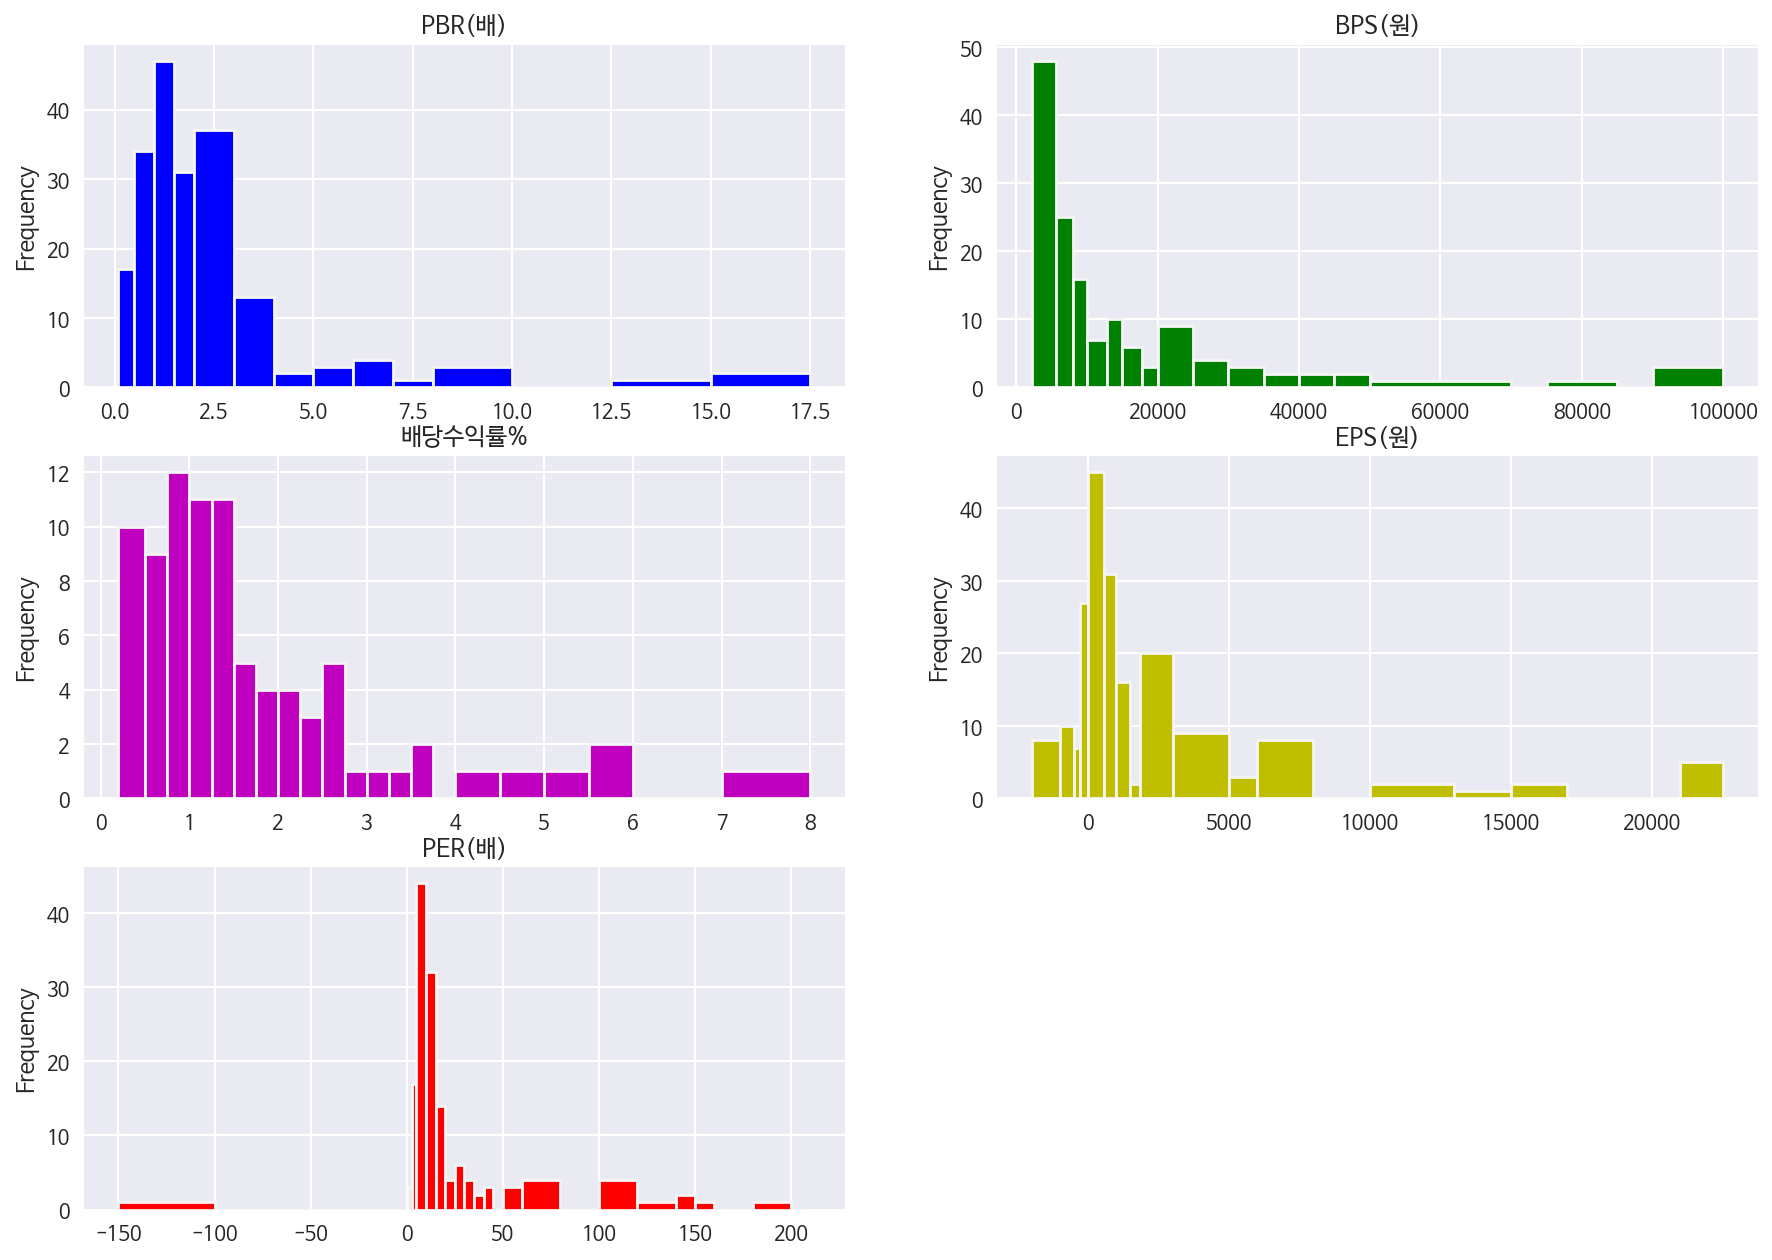

In [83]:
fig = plt.figure(figsize=(15,75))

for i, col in enumerate(df):
    if 21 <= i <= 25:
        ax = fig.add_subplot(20,2, i)
        ax.title.set_text(col)
        if col == "PER(배)":
            df[col].plot.hist(bins=[-150,-100,0,1,3,5,10,15,20,25,30,35,40,45,50,60,80,90,100,120,140,150,160,170,180,200,210],color='r',edgecolor = 'whitesmoke',linewidth = 1.4)
        elif col == "PBR(배)":
            df[col].plot.hist(bins=[0.1,0.5,1,1.5,2,3,4,5,6,7,8,10,12.5,15,17.5],color='b',edgecolor = 'whitesmoke',linewidth = 1.4)
        elif col == "BPS(원)":
            df[col].plot.hist(bins=[2180,5700,8000,10000,12800,15000,17800,20000,25000,30000,35000,40000,45000,50000,70000,75000,85000,90000,100000],color='g',edgecolor = 'whitesmoke',linewidth = 1.4)
        elif col == "배당수익률%":
            df[col].plot.hist(bins=[0.2,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.5,5,5.5,6,7,8],color='m',edgecolor = 'whitesmoke',linewidth = 1.4)
        elif col == "EPS(원)":
            df[col].plot.hist(bins=[-2000,-1000,-500,-300,0,568,1000,1500,1835,3000,5000,6000,8000,9000,10000,13000,15000,17000,19000,21000,22538],color='y',edgecolor = 'whitesmoke',linewidth = 1.4)
       
plt.show()

### PER 상하위 종목 분석 

#### 업종별 PER(배)가 낮은 하위 5개 종목

In [84]:
per_low=df[cols].sort_values(by="PER(배)", ascending=True).groupby("업종명").head(5)
per_low

,조회일자,업종명,종목명,종목코드,거래대금,거래량,배당수익률%,시가총액(억원),PER(배),EPS(원),PBR(배),BPS(원)
16,2022-09-20,반도체와반도체장비,유니테스트 *,086390,1747.0,99810.0,NaN,3709,-180.17,-570,2.48,7067.0
163,2022-09-20,방송과엔터테인먼트,CJ CGV,079160,1846.0,99728.0,NaN,8850,-124.81,-6721,17.35,1069.0
192,2022-09-20,방송과엔터테인먼트,초록뱀컴퍼니 *,052300,133.0,194923.0,NaN,784,1.11,614,0.29,2372.0
69,2022-09-20,반도체와반도체장비,한국전자홀딩스,006200,239.0,179012.0,NaN,622,2.38,559,0.41,3209.0
122,2022-09-20,반도체와반도체장비,SK스퀘어,402340,14193.0,350921.0,NaN,56870,2.49,16134,0.32,124052.0
50,2022-09-20,반도체와반도체장비,케이씨,029460,292.0,17393.0,1.76,2304,3.16,5382,0.31,54737.0
30,2022-09-20,반도체와반도체장비,엑사이엔씨 *,054940,195.0,148376.0,NaN,440,3.27,405,0.71,1867.0
140,2022-09-20,자동차,현대차3우B,005389,262.0,2960.0,5.71,2149,3.93,22538,0.28,312476.0
139,2022-09-20,자동차,현대차우,005385,1254.0,13587.0,5.49,22408,4.08,22538,0.29,312476.0
141,2022-09-20,자동차,현대차2우B,005387,3406.0,36762.0,5.54,33567,4.08,22538,0.29,312476.0


#### 업종별 PER(배)가 높은 상위 5개 종목

In [85]:
per_high=df[cols].sort_values(by="PER(배)", ascending=False).groupby("업종명").head(5)
per_high.head()

,조회일자,업종명,종목명,종목코드,거래대금,거래량,배당수익률%,시가총액(억원),PER(배),EPS(원),PBR(배),BPS(원)
79,2022-09-20,반도체와반도체장비,바른전자 *,064520,882.0,176222.0,NaN,417,1653.33,3,0.95,5217.0
152,2022-09-20,방송과엔터테인먼트,위지윅스튜디오 *,299900,3672.0,164779.0,NaN,9536,258.36,-483,5.40,4133.0
156,2022-09-20,방송과엔터테인먼트,덱스터 *,206560,1655.0,128621.0,NaN,3253,199.31,-343,6.27,2040.0
183,2022-09-20,방송과엔터테인먼트,쇼박스 *,086980,2079.0,423907.0,NaN,3038,151.56,32,2.23,2172.0
154,2022-09-20,방송과엔터테인먼트,키이스트 *,054780,153.0,19432.0,NaN,1546,143.82,55,2.28,3475.0


#### 업종별로 PER(배) 높은 상위 5개종목 시각화

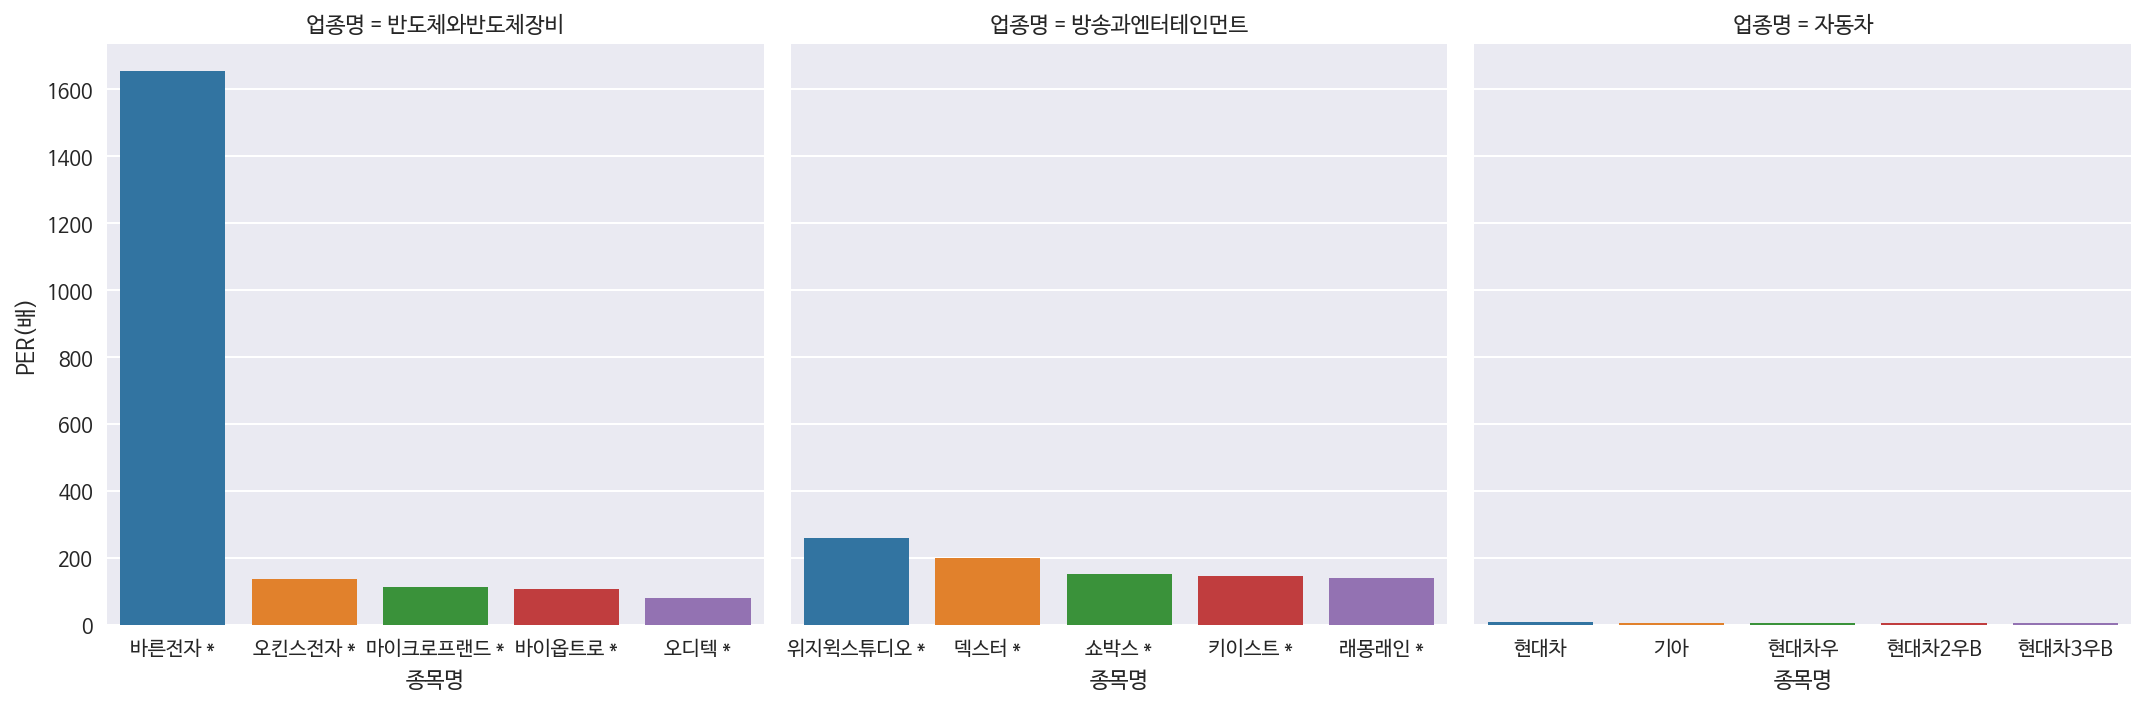

In [86]:
sns.catplot(data=per_high,
            x="종목명", y="PER(배)", kind="bar", col="업종명", col_wrap=3,sharex=False,palette='tab10')

#### 업종별로 PER(배) 낮은 하위 5개종목 시각화


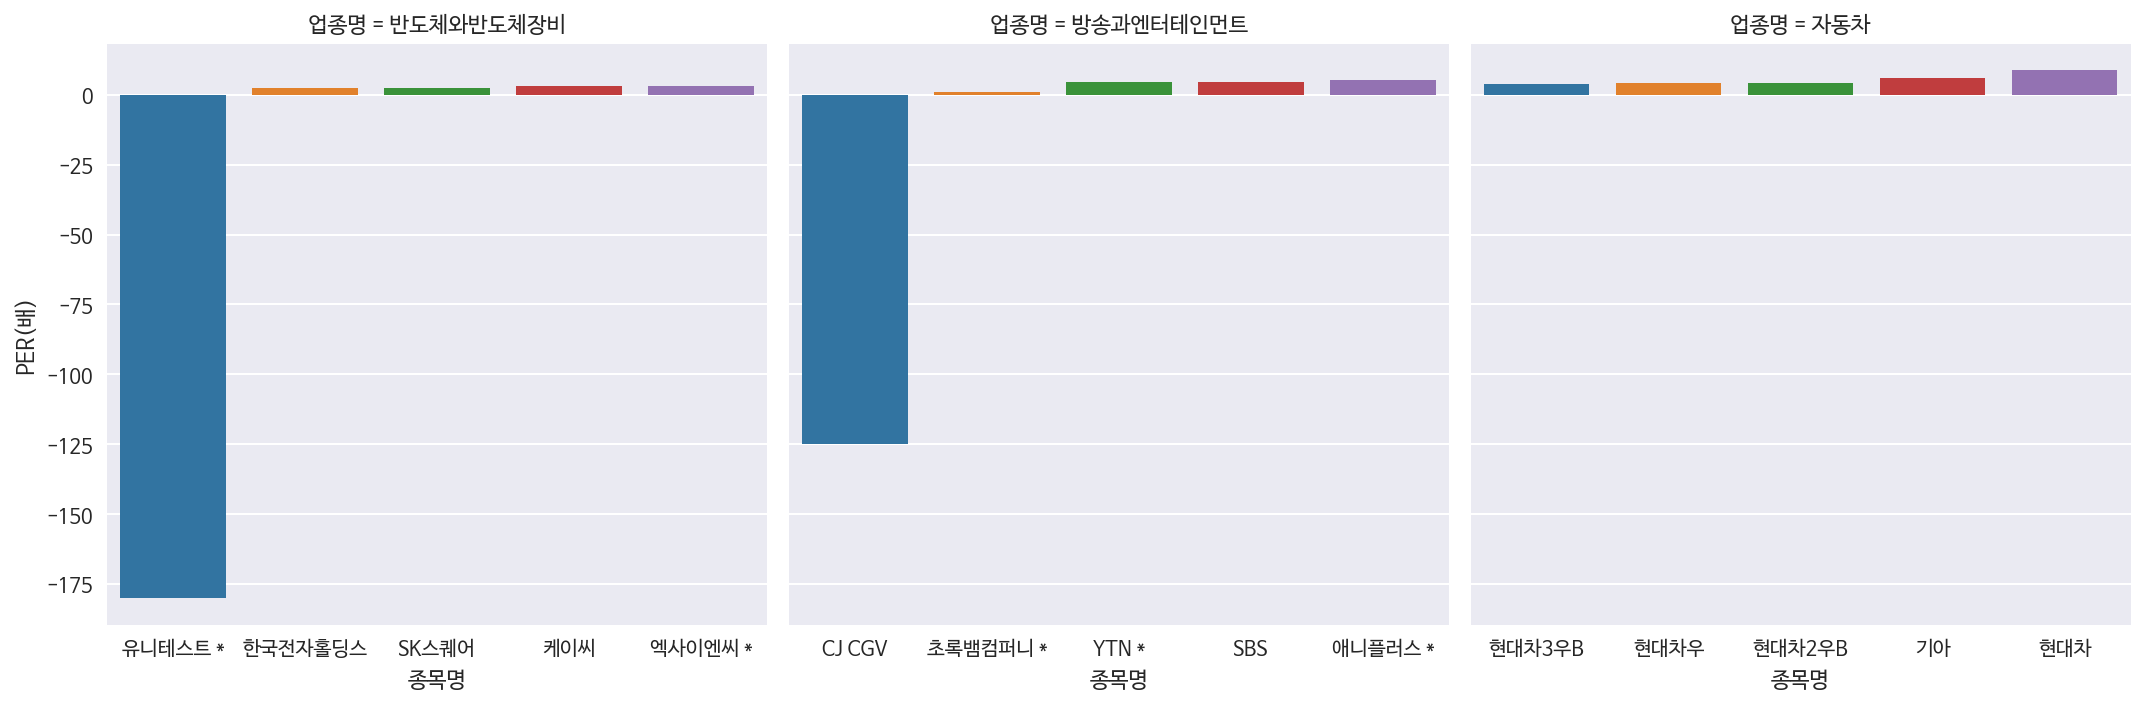

In [87]:
sns.catplot(data=per_low,
            x="종목명", y="PER(배)", kind="bar", col="업종명", col_wrap=3,sharex=False,palette='tab10')

#### 업종별 PER(배) 최소값 최대값 

In [88]:
#최소값
per_min=df[cols].groupby("업종명").min()[['PER(배)',"종목명"]]
per_min

,PER(배),종목명
업종명,,
반도체와반도체장비,-180.17,DB하이텍
방송과엔터테인먼트,-124.81,CJ CGV
자동차,3.93,KR모터스


In [89]:
#최대값
per_max=df[cols].groupby("업종명").max()[['PER(배)',"종목명"]]
per_max

,PER(배),종목명
업종명,,
반도체와반도체장비,1653.33,해성디에스
방송과엔터테인먼트,258.36,한국경제TV *
자동차,8.81,현대차우


#### PER 최소값 최대값 subplot이용하여 시각화 

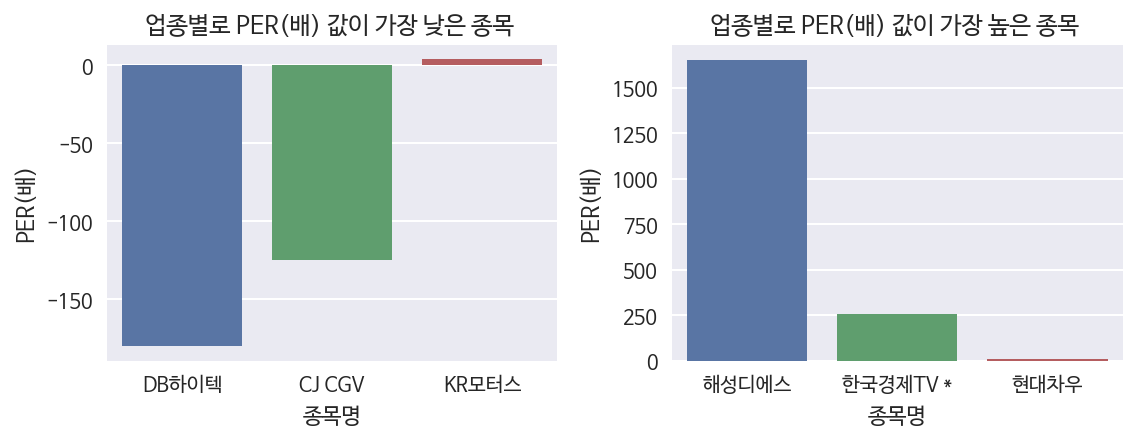

In [90]:
plt.subplot(2,2, 1)                
sns.barplot(x="종목명",y="PER(배)", data=per_min)
plt.title('업종별로 PER(배) 값이 가장 낮은 종목 ')

plt.subplot(2, 2, 2)               
sns.barplot(x="종목명",y="PER(배)", data=per_max)
plt.title('업종별로 PER(배) 값이 가장 높은 종목 ')

plt.tight_layout()
plt.show()

### PBR 상하위 종목 분석
* `PBR = 주가/BPS(주당순자산가치)`

#### 업종별 PBR(배)가 낮은 하위 5개 종목

In [91]:
pbr_low=df[cols].sort_values(by="PBR(배)", ascending=True).groupby("업종명").head(5)
pbr_low.head()

,조회일자,업종명,종목명,종목코드,거래대금,거래량,배당수익률%,시가총액(억원),PER(배),EPS(원),PBR(배),BPS(원)
91,2022-09-20,반도체와반도체장비,테라셈 *,182690,0.0,0.0,NaN,20,NaN,-363,0.11,898.0
75,2022-09-20,반도체와반도체장비,원익홀딩스 *,030530,1096.0,319863.0,NaN,2622,3.49,972,0.26,13114.0
140,2022-09-20,자동차,현대차3우B,005389,262.0,2960.0,5.71,2149,3.93,22538,0.28,312476.0
141,2022-09-20,자동차,현대차2우B,005387,3406.0,36762.0,5.54,33567,4.08,22538,0.29,312476.0
192,2022-09-20,방송과엔터테인먼트,초록뱀컴퍼니 *,052300,133.0,194923.0,NaN,784,1.11,614,0.29,2372.0


#### 업종별 PBR(배)가 높은 상위 5개 종목

In [92]:
pbr_high=df[cols].sort_values(by="PBR(배)", ascending=False).groupby("업종명").head(5)
pbr_high.head()

,조회일자,업종명,종목명,종목코드,거래대금,거래량,배당수익률%,시가총액(억원),PER(배),EPS(원),PBR(배),BPS(원)
163,2022-09-20,방송과엔터테인먼트,CJ CGV,079160,1846.0,99728.0,NaN,8850,-124.81,-6721,17.35,1069.0
10,2022-09-20,반도체와반도체장비,HPSP *,403870,11396.0,175482.0,NaN,12864,30.42,2130,15.25,4250.0
137,2022-09-20,자동차,스마트솔루션즈 *,136510,0.0,0.0,NaN,3353,NaN,-858,14.76,786.0
27,2022-09-20,반도체와반도체장비,하이딥 *,365590,289.0,238123.0,NaN,1677,NaN,-42,9.53,128.0
77,2022-09-20,반도체와반도체장비,오킨스전자 *,080580,358.0,17879.0,NaN,3527,136.64,146,9.50,2099.0


#### 업종별로 PER(배) 높은 상위 5개종목 시각화

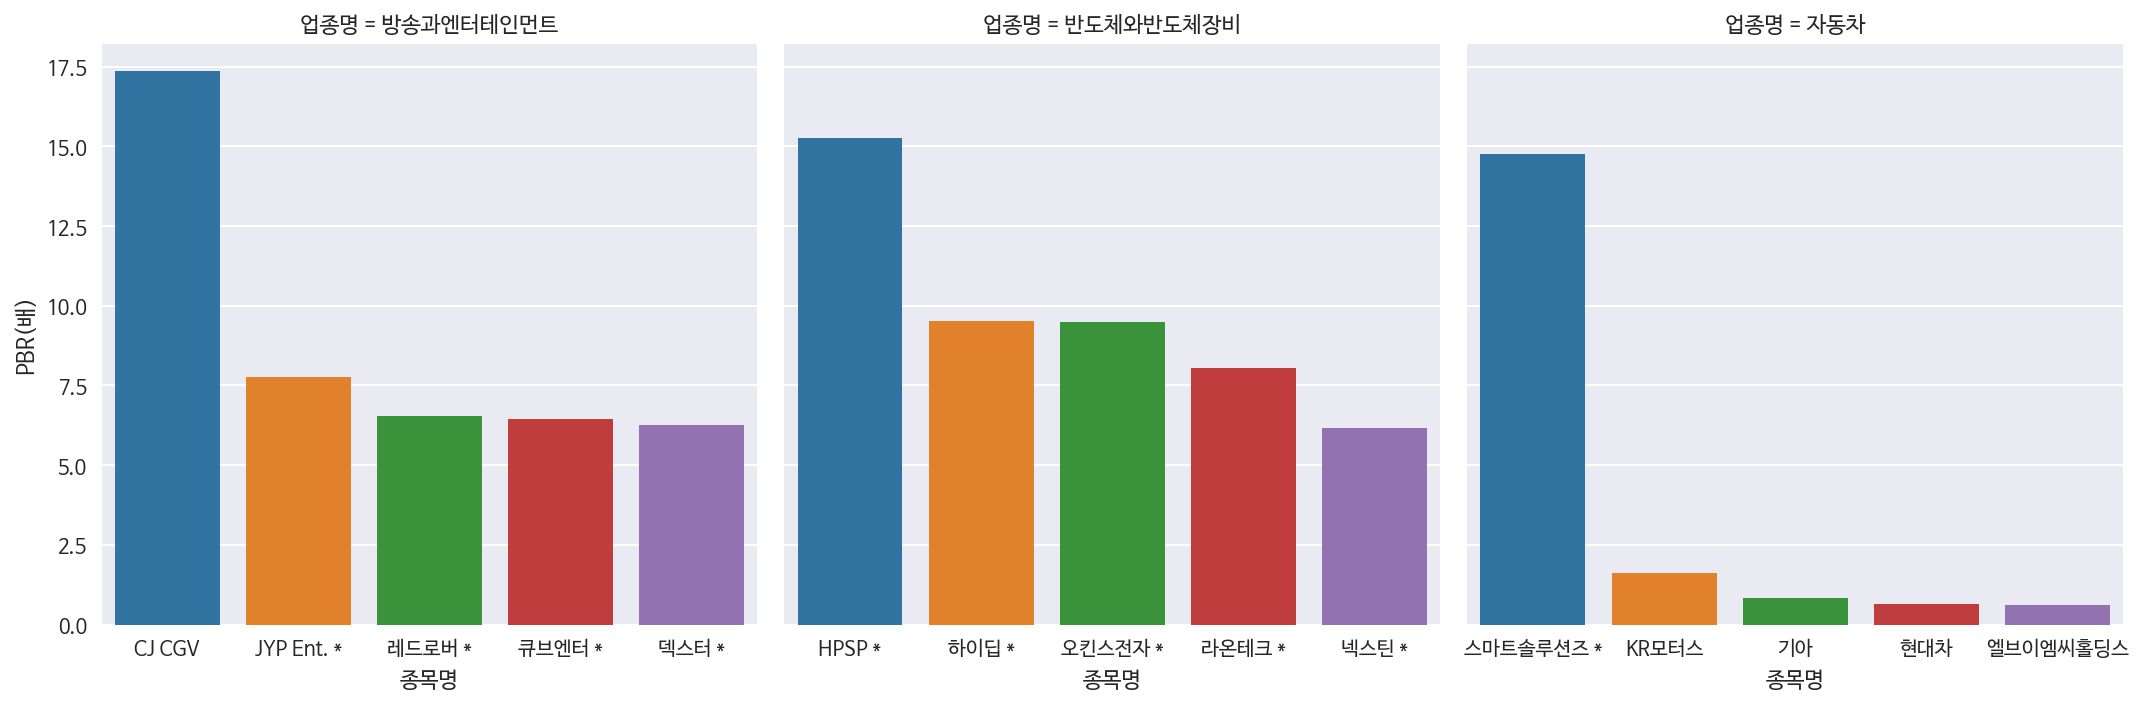

In [93]:
sns.catplot(data=pbr_high,
            x="종목명", y="PBR(배)", kind="bar", col="업종명", col_wrap=3,sharex=False,palette='tab10')

#### 업종별로 PER(배) 낮은 하위 5개종목 시각화

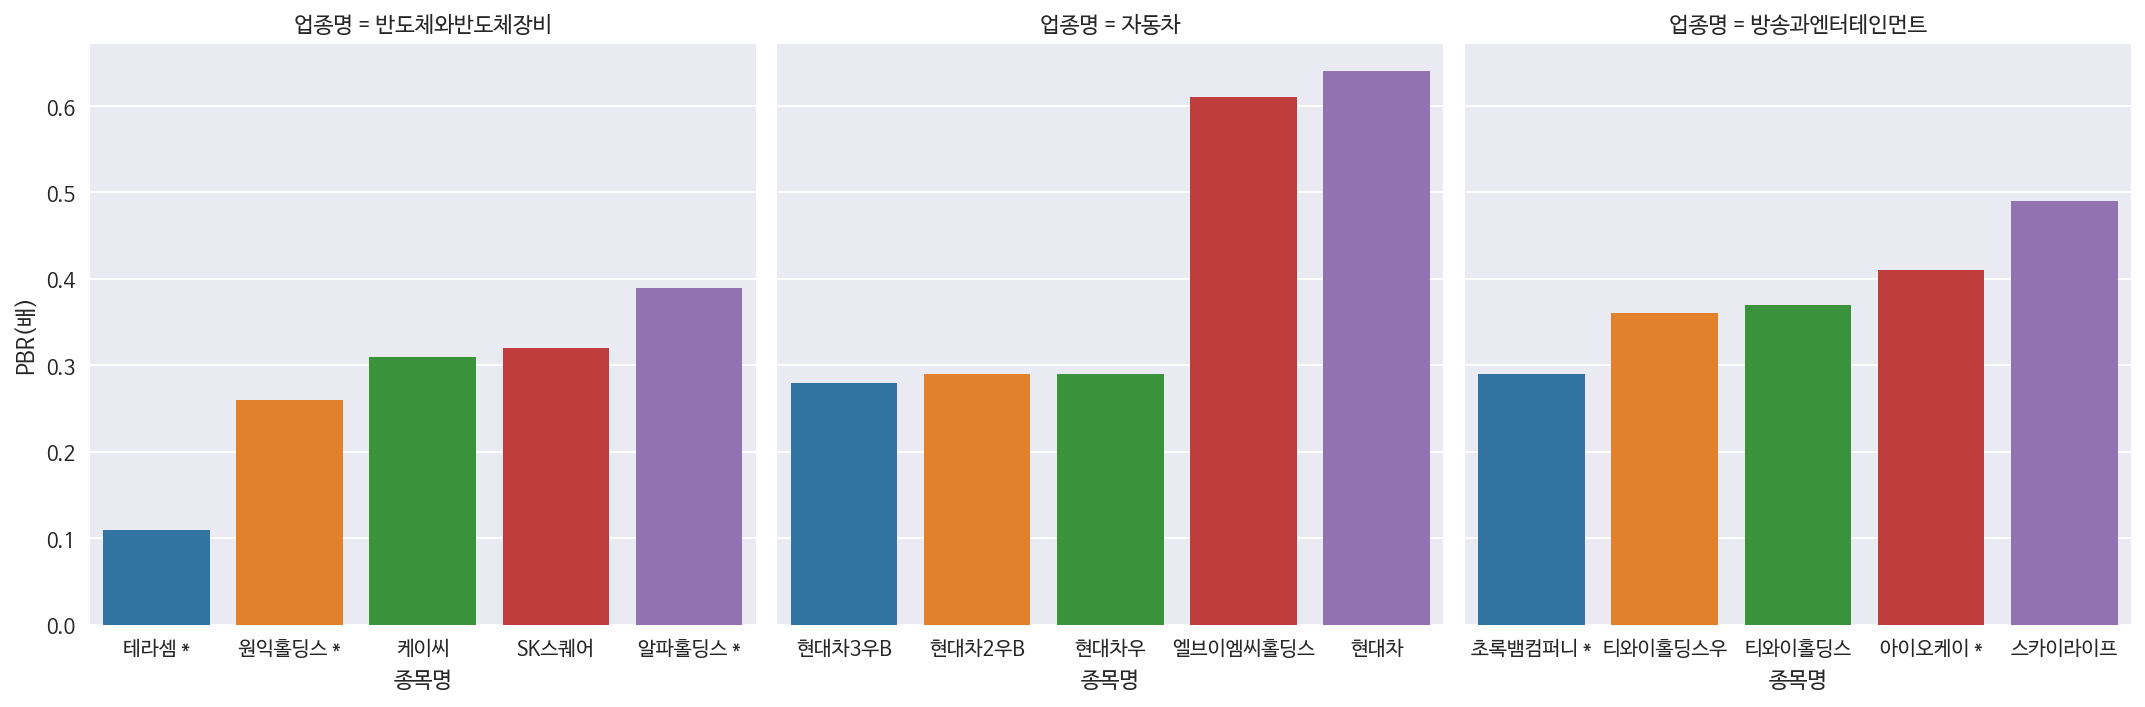

In [94]:
sns.catplot(data=pbr_low,
            x="종목명", y="PBR(배)", kind="bar", col="업종명", col_wrap=3,sharex=False,palette='tab10')

#### 업종별 PER(배) 최소값 최대값 

In [95]:
#최소값
pbr_min=df[cols].groupby("업종명").min()[['PBR(배)',"종목명"]]
pbr_min

,PBR(배),종목명
업종명,,
반도체와반도체장비,0.11,DB하이텍
방송과엔터테인먼트,0.29,CJ CGV
자동차,0.28,KR모터스


In [96]:
#최대값
pbr_max=df[cols].groupby("업종명").max()[['PBR(배)',"종목명"]]
pbr_max

,PBR(배),종목명
업종명,,
반도체와반도체장비,15.25,해성디에스
방송과엔터테인먼트,17.35,한국경제TV *
자동차,14.76,현대차우


####  PBR 최소값 최대값 subplot이용하여 시각화 

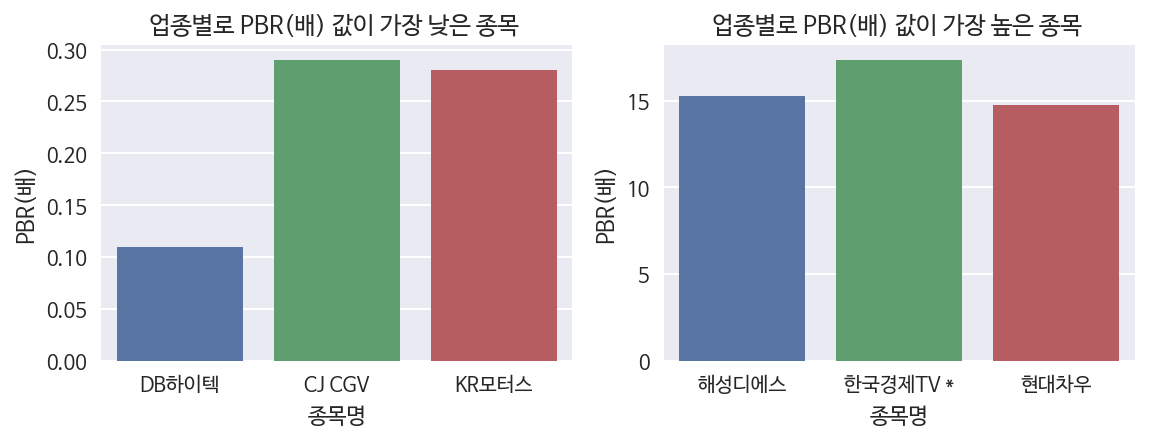

In [97]:
plt.subplot(2,2, 1)                
sns.barplot(x="종목명",y="PBR(배)", data=pbr_min)
plt.title('업종별로 PBR(배) 값이 가장 낮은 종목 ')

plt.subplot(2, 2, 2)               
sns.barplot(x="종목명",y="PBR(배)", data=pbr_max)
plt.title('업종별로 PBR(배) 값이 가장 높은 종목 ')

plt.tight_layout()
plt.show()

## 이상치검출

##### 이상치 존재 유무 시각화

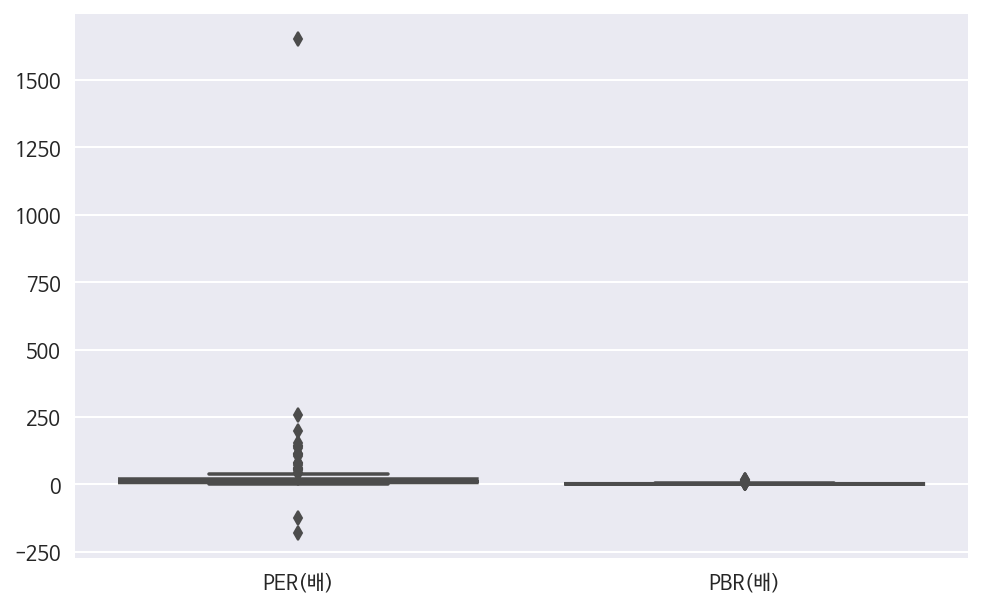

In [98]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['PER(배)','PBR(배)']],color='red',notch=True)
plt.show()

##### 이상치값 IQR 구하기

In [99]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

(현재가           -2.119375e+04
 전일비           -4.000000e+02
 거래량           -3.080905e+05
 거래대금          -3.754625e+03
 전일거래량         -3.845795e+05
 매출액           -2.395250e+03
 영업이익          -4.810000e+02
 당기순이익         -4.167500e+02
 영업이익률         -9.522500e+00
 순이익률          -1.291000e+01
 상장주식수         -3.966534e+07
 동일업종 PER      -2.955000e+01
 시가총액(억원)      -3.284625e+03
 시가총액순위(전처리)   -7.786250e+02
 PBR(배)        -1.027500e+00
 BPS(원)        -1.381775e+04
 배당수익률%        -8.800000e-01
 EPS(원)        -2.782625e+03
 PER(배)        -1.317500e+01
 dtype: float64, 현재가            4.409625e+04
 전일비            7.200000e+02
 거래량            6.017355e+05
 거래대금           6.798375e+03
 전일거래량          7.939825e+05
 매출액            5.902750e+03
 영업이익           1.107000e+03
 당기순이익          1.017250e+03
 영업이익률          4.357750e+01
 순이익률           4.469000e+01
 상장주식수          9.916523e+07
 동일업종 PER       6.885000e+01
 시가총액(억원)       7.836375e+03
 시가총액순위(전처리)    1.922375e+03
 PBR(배)         4.352500e+0

##### 'PER' 열에 대하여 이상치 여부를 판별해주는 함수

In [100]:
def is_PER_outlier(df):
  per_score = df['PER(배)']
  if per_score > Q3['PER(배)'] + 1.5 * IQR['PER(배)'] or per_score < Q1['PER(배)'] - 1.5 * IQR['PER(배)']:
      return True
  else:
      return False

df['PER_IQR'] = df.apply(is_PER_outlier, axis = 1) # axis = 1 지정 필수
df.head(1)

,종목명,현재가,전일비,등락률,거래량,거래대금,전일거래량,업종명,조회일자,종목코드,...,동일업종 등락률,코스피/코스닥,시가총액(억원),시가총액순위(전처리),PBR(배),BPS(원),배당수익률%,EPS(원),PER(배),PER_IQR
0,WI *,1140.0,234.0,+25.83%,9171446.0,10065.0,231771.0,반도체와반도체장비,2022-09-20,073570,...,-1.10%,코스닥,922,896,3.1,368.0,NaN,-133,NaN,False


##### 'PBR' 열에 대하여 이상치 여부를 판별해주는 함수

In [101]:
def is_PBR_outlier(df):
  pbr_score = df['PBR(배)']
  if pbr_score > Q3['PBR(배)'] + 1.5 * IQR['PBR(배)'] or pbr_score < Q1['PBR(배)'] - 1.5 * IQR['PBR(배)']:
      return True
  else:
      return False
df['PBR_IQR'] = df.apply(is_PBR_outlier, axis = 1) # axis = 1 지정 필수
df.head(1)

,종목명,현재가,전일비,등락률,거래량,거래대금,전일거래량,업종명,조회일자,종목코드,...,코스피/코스닥,시가총액(억원),시가총액순위(전처리),PBR(배),BPS(원),배당수익률%,EPS(원),PER(배),PER_IQR,PBR_IQR
0,WI *,1140.0,234.0,+25.83%,9171446.0,10065.0,231771.0,반도체와반도체장비,2022-09-20,073570,...,코스닥,922,896,3.1,368.0,NaN,-133,NaN,False,False


In [102]:
df.shape

(198, 28)

#### PER이 이상치값일 때 제거하여 필터링

In [103]:
del_outliers = df.loc[df['PER_IQR'] == False]
# 이상치여부를 나타내는 열 제거
del del_outliers['PER_IQR']
del_outliers.shape

(175, 27)

##### PBR이 이상치값일 때 제거하여 필터링


In [104]:
del_outliers = del_outliers.loc[del_outliers['PBR_IQR'] == False]
# 이상치여부를 나타내는 열 제거
del del_outliers['PBR_IQR']
del_outliers.shape

(164, 26)

##### 결측치/이상치를 모두 제거 한 후 시각화

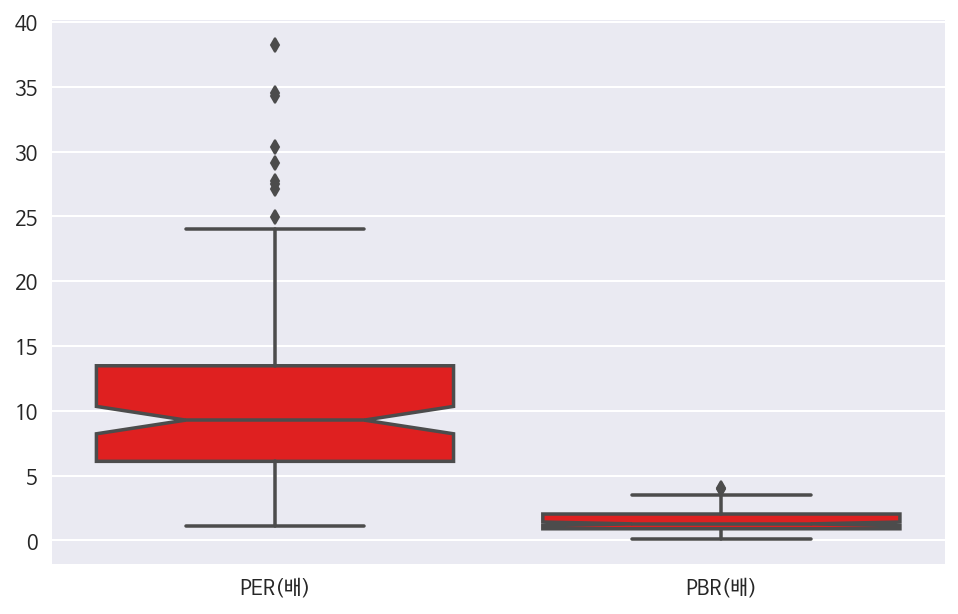

In [105]:
plt.figure(figsize=(8,5))
sns.boxplot(data=del_outliers[['PER(배)','PBR(배)']],color='red',notch=True)
plt.show()

### PER 와 PBR의 상관 분석


#####  PER와 PBR의 상관계수를 구합니다.


In [106]:
del_outliers[["PER(배)", "PBR(배)"]].corr()

,PER(배),PBR(배)
PER(배),1.000000,0.430566
PBR(배),0.430566,1.000000


##### PER와 PBR이 선형성확인  :  scatterplot

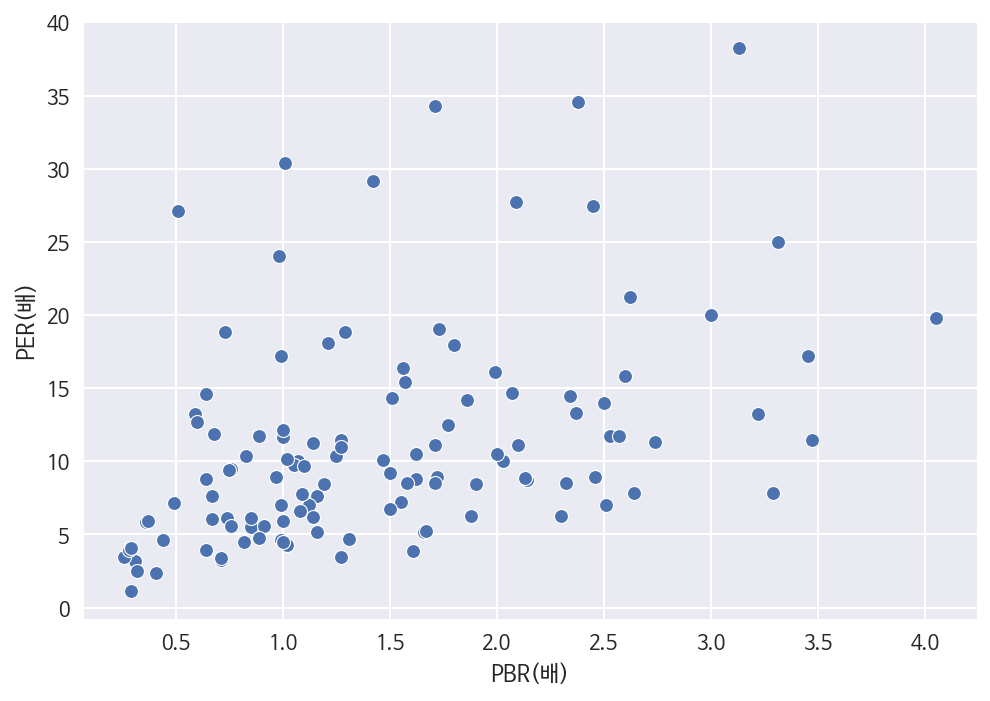

In [107]:
sns.scatterplot(data=del_outliers, y="PER(배)", x="PBR(배)")

##### PER와 PBR이 선형성확인 : regplot

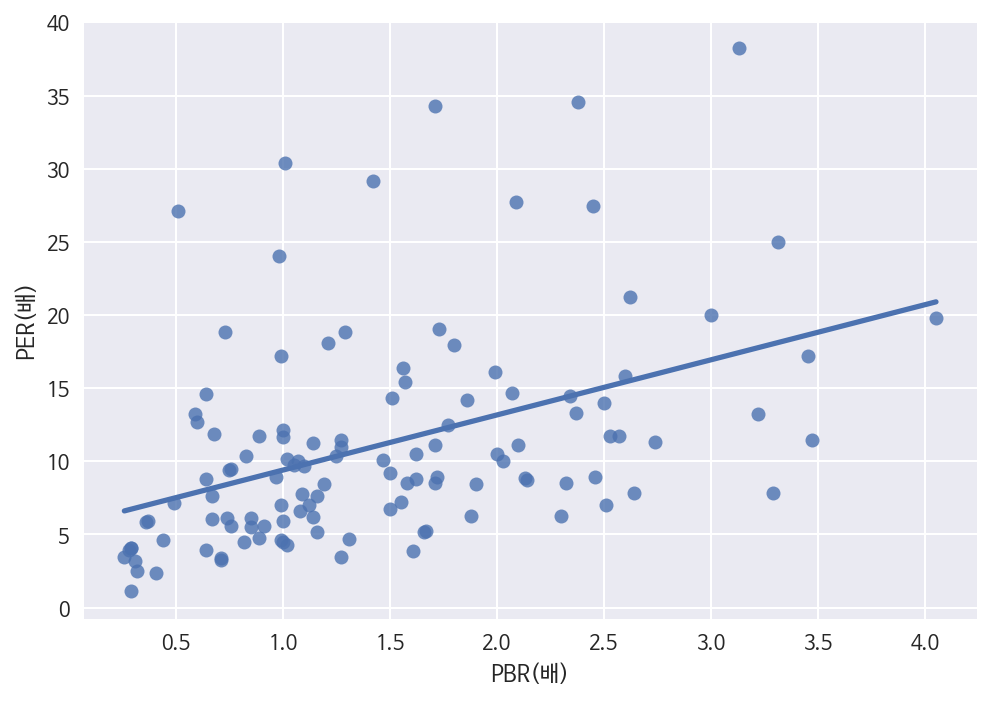

In [108]:
sns.regplot(data=del_outliers, y="PER(배)", x="PBR(배)", ci=None)

### 배당수익률 높은 종목

##### 결측치가 아닌 값 중 배당수익률% 상위 10종목

In [109]:
df_div = df[df["배당수익률%"].notnull()].sort_values(by="배당수익률%", ascending=False).head(10)
df_div

,종목명,현재가,전일비,등락률,거래량,거래대금,전일거래량,업종명,조회일자,종목코드,...,코스피/코스닥,시가총액(억원),시가총액순위(전처리),PBR(배),BPS(원),배당수익률%,EPS(원),PER(배),PER_IQR,PBR_IQR
108,에이피티씨 *,15250.0,100.0,-0.65%,53559.0,820.0,33051.0,반도체와반도체장비,2022-09-20,089970,...,코스닥,3657,194,2.64,5769.0,7.87,1947,7.83,False,False
140,현대차3우B,88500.0,700.0,-0.78%,2960.0,262.0,5517.0,자동차,2022-09-20,005389,...,코스피,2149,567,0.28,312476.0,5.71,22538,3.93,False,False
141,현대차2우B,92000.0,800.0,-0.86%,36762.0,3406.0,29129.0,자동차,2022-09-20,005387,...,코스피,33567,87,0.29,312476.0,5.54,22538,4.08,False,False
139,현대차우,92000.0,600.0,-0.65%,13587.0,1254.0,24574.0,자동차,2022-09-20,005385,...,코스피,22408,122,0.29,312476.0,5.49,22538,4.08,False,False
44,피에스케이홀딩스 *,8300.0,110.0,+1.34%,8521.0,71.0,19684.0,반도체와반도체장비,2022-09-20,031980,...,코스닥,1790,458,0.67,12376.0,4.82,1362,6.09,False,False
164,스카이라이프,8490.0,110.0,+1.31%,38303.0,326.0,66016.0,방송과엔터테인먼트,2022-09-20,053210,...,코스피,4060,371,0.49,17208.0,4.12,1190,7.13,False,False
138,기아,80400.0,400.0,-0.50%,691533.0,55807.0,676114.0,자동차,2022-09-20,000270,...,코스피,325912,10,0.85,94603.0,3.73,13066,6.15,False,False
112,디아이,5600.0,40.0,-0.71%,25179.0,142.0,60186.0,반도체와반도체장비,2022-09-20,003160,...,코스피,1764,627,0.99,5662.0,3.57,325,17.23,False,False
31,유니퀘스트,9070.0,170.0,+1.91%,111364.0,1018.0,110041.0,반도체와반도체장비,2022-09-20,077500,...,코스피,2481,516,0.71,12734.0,3.31,2652,3.42,False,False
29,테스 *,18450.0,350.0,+1.93%,58571.0,1081.0,44289.0,반도체와반도체장비,2022-09-20,095610,...,코스닥,3647,197,1.12,16518.0,3.04,2631,7.01,False,False


##### 배당수익률 TOP10 업종별로 시각화
    - 자동차와 반도체와반도체장비 업종의 배당수익률이 높다

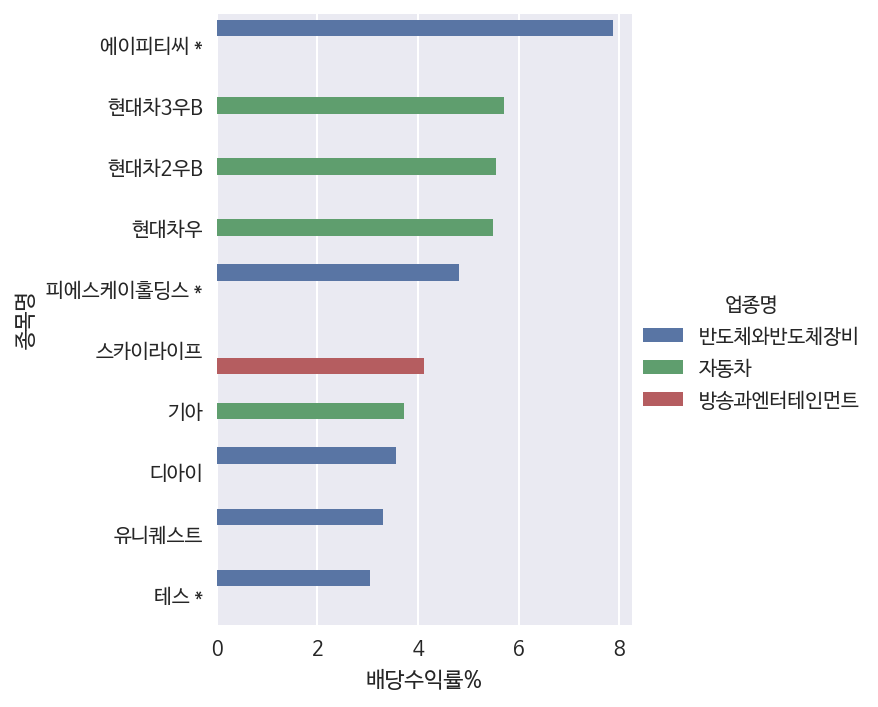

In [110]:
sns.factorplot(x='배당수익률%', y='종목명', hue ='업종명', kind ='bar' , data =df_div )

### 코스피 중 시가총액이 가장 많은 종목 TOP 10

(1000.0, 900000.0)

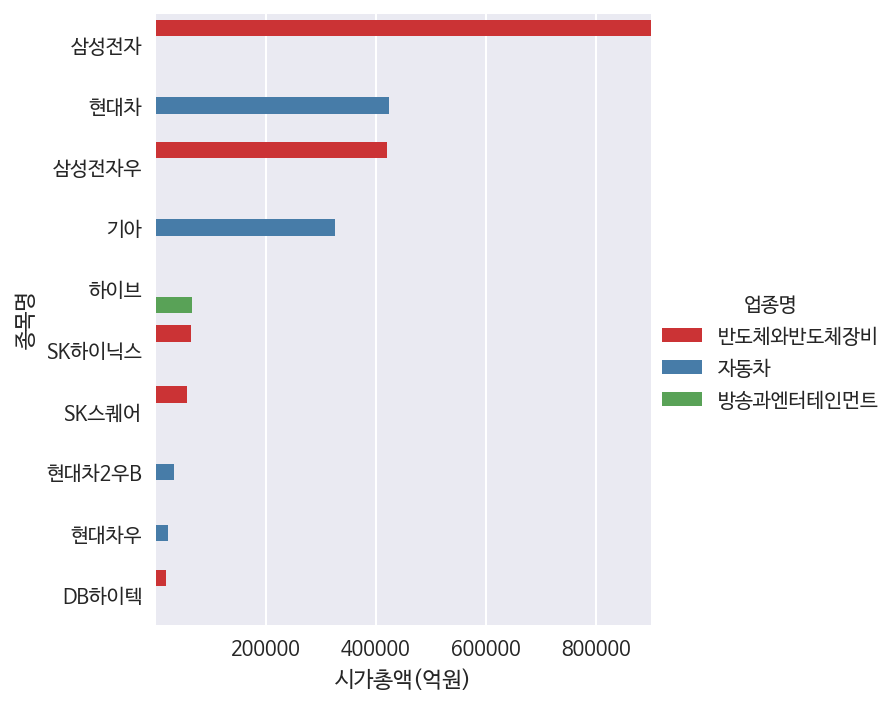

In [111]:
kospi = (df['코스피/코스닥'] == "코스피")
# 코스피중에서 시가총액(억원) 상위 10개 종목을 찾습니다.
시가총액 = df[kospi].sort_values(by="시가총액(억원)", ascending=False).head(10)
sns.factorplot(x='시가총액(억원)', y='종목명', hue ='업종명', kind ='bar' , data =시가총액,palette='Set1')
plt.xlim([1000, 900000])

### 코스피중 거래량이 가장 많은 종목 TOP 10

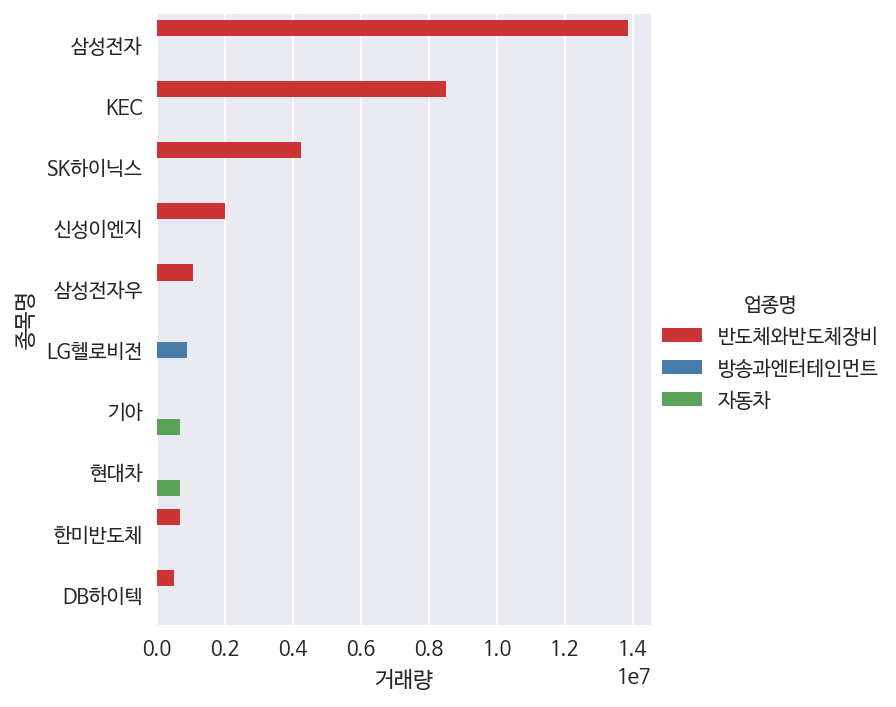

In [112]:
# 거래량 column으로 sorting을 해보면 확인할 수 있습니다.
# 거래량을 볼 때는 가격을 함께 참고해 보세요.
거래량 = df[kospi].sort_values("거래량", ascending=False).head(10)
sns.factorplot(x='거래량', y='종목명', hue ='업종명', kind ='bar' , data =거래량 ,palette='Set1')

#### 2022유망 업종데이터에서 거래대금이 15위 안에 있는 코스피 종목 중에 "PER(배)"가  높은 종목

In [113]:
kospi_20 = df[kospi].sort_values("거래대금", ascending=False).head(15)
kospi_20_per = kospi_20.sort_values("PER(배)", ascending=False)

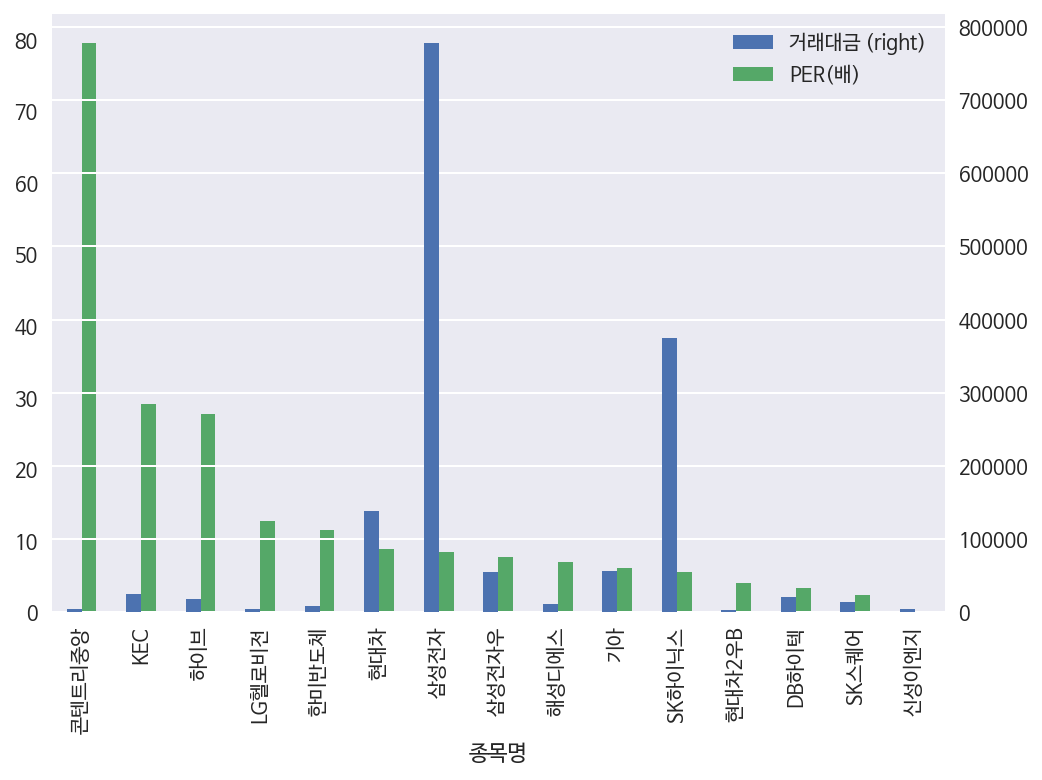

In [114]:
kospi_20_per[["종목명", "거래대금", "PER(배)"]].set_index("종목명").plot.bar(secondary_y="거래대금")

#### 2022유망 업종데이터에서 거래대금이 15위 안에 있는 코스피 종목 중에 "PER(배)"가 낮은 종목

In [115]:
kospi_20 = df[kospi].sort_values("거래대금", ascending=False).tail(15)
kospi_20_per = kospi_20.sort_values("PER(배)", ascending=False)

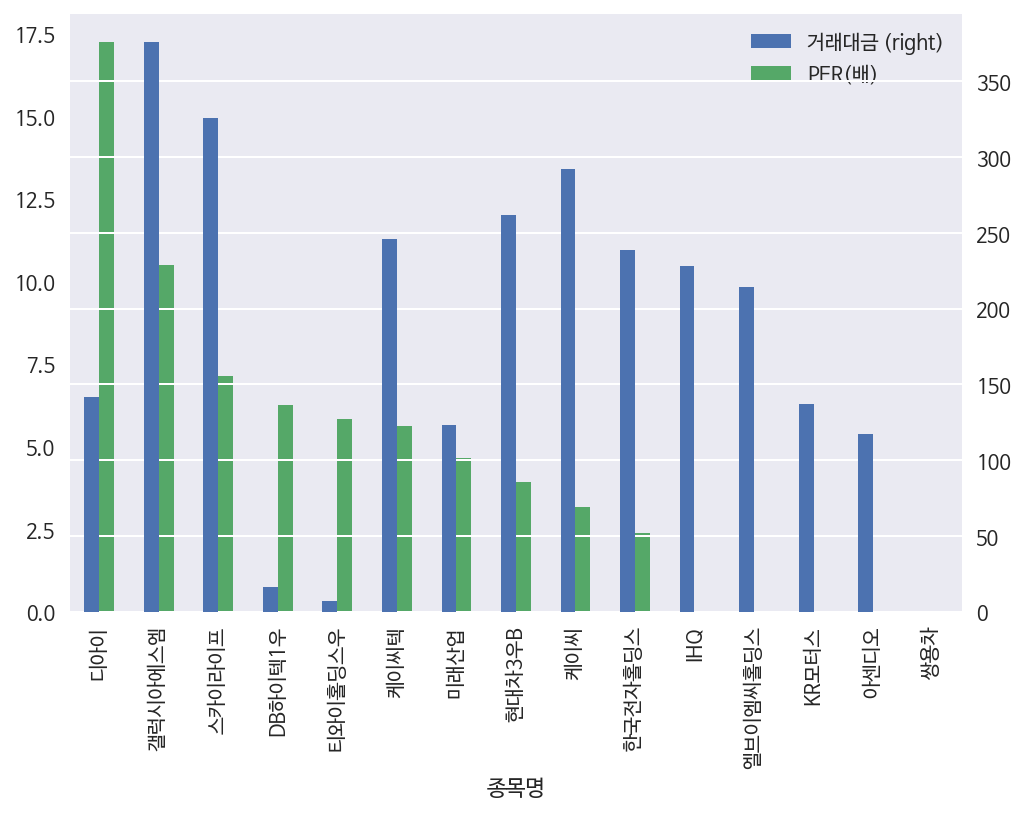

In [116]:
kospi_20_per[["종목명", "거래대금", "PER(배)"]].set_index("종목명").plot.bar(secondary_y="거래대금")

#### 컬럼별 상관관계 분석

##### 필요컬럼만 추출

In [117]:
df_corr=df[["종목명","거래량","거래대금","업종명","시가총액(억원)","PBR(배)","BPS(원)","배당수익률%","EPS(원)","PER(배)"]]
df_corr

,종목명,거래량,거래대금,업종명,시가총액(억원),PBR(배),BPS(원),배당수익률%,EPS(원),PER(배)
0,WI *,9171446.0,10065.0,반도체와반도체장비,922,3.10,368.0,NaN,-133,NaN
1,코디엠 *,8260735.0,3770.0,반도체와반도체장비,267,0.43,1026.0,NaN,-272,NaN
2,에스앤에스텍 *,535243.0,12907.0,반도체와반도체장비,5202,2.81,8623.0,0.41,556,43.62
3,타이거일렉 *,67349.0,1569.0,반도체와반도체장비,1471,2.62,8879.0,NaN,1098,21.22
4,아진엑스텍 *,245178.0,2745.0,반도체와반도체장비,1121,2.38,4839.0,1.30,333,34.53
...,...,...,...,...,...,...,...,...,...,...
193,티와이홀딩스,31751.0,462.0,방송과엔터테인먼트,7436,0.37,39323.0,NaN,2461,5.93
194,와이지엔터테인먼트 *,299066.0,15631.0,방송과엔터테인먼트,9679,2.50,20751.0,0.48,455,114.07
195,코퍼스코리아 *,175773.0,382.0,방송과엔터테인먼트,769,1.56,1376.0,0.70,131,16.41
196,콘텐트리중앙,142798.0,4891.0,방송과엔터테인먼트,6519,3.86,8808.0,NaN,-1856,79.56


##### 상관계수 구하기

In [118]:
df_corr.corr()

,거래량,거래대금,시가총액(억원),PBR(배),BPS(원),배당수익률%,EPS(원),PER(배)
거래량,1.000000,0.591365,0.502948,-0.061476,-0.006124,0.045400,0.032184,-0.024209
거래대금,0.591365,1.000000,0.892406,-0.041298,0.172856,0.071356,0.246524,-0.028283
시가총액(억원),0.502948,0.892406,1.000000,-0.038064,0.130767,0.111205,0.158640,-0.020911
PBR(배),-0.061476,-0.041298,-0.038064,1.000000,-0.163930,-0.290285,-0.179728,-0.009252
BPS(원),-0.006124,0.172856,0.130767,-0.163930,1.000000,0.522501,0.824485,-0.057675
배당수익률%,0.045400,0.071356,0.111205,-0.290285,0.522501,1.000000,0.407401,-0.216355
EPS(원),0.032184,0.246524,0.158640,-0.179728,0.824485,0.407401,1.000000,-0.086721
PER(배),-0.024209,-0.028283,-0.020911,-0.009252,-0.057675,-0.216355,-0.086721,1.000000


##### 상관계수 히트맵 시각화

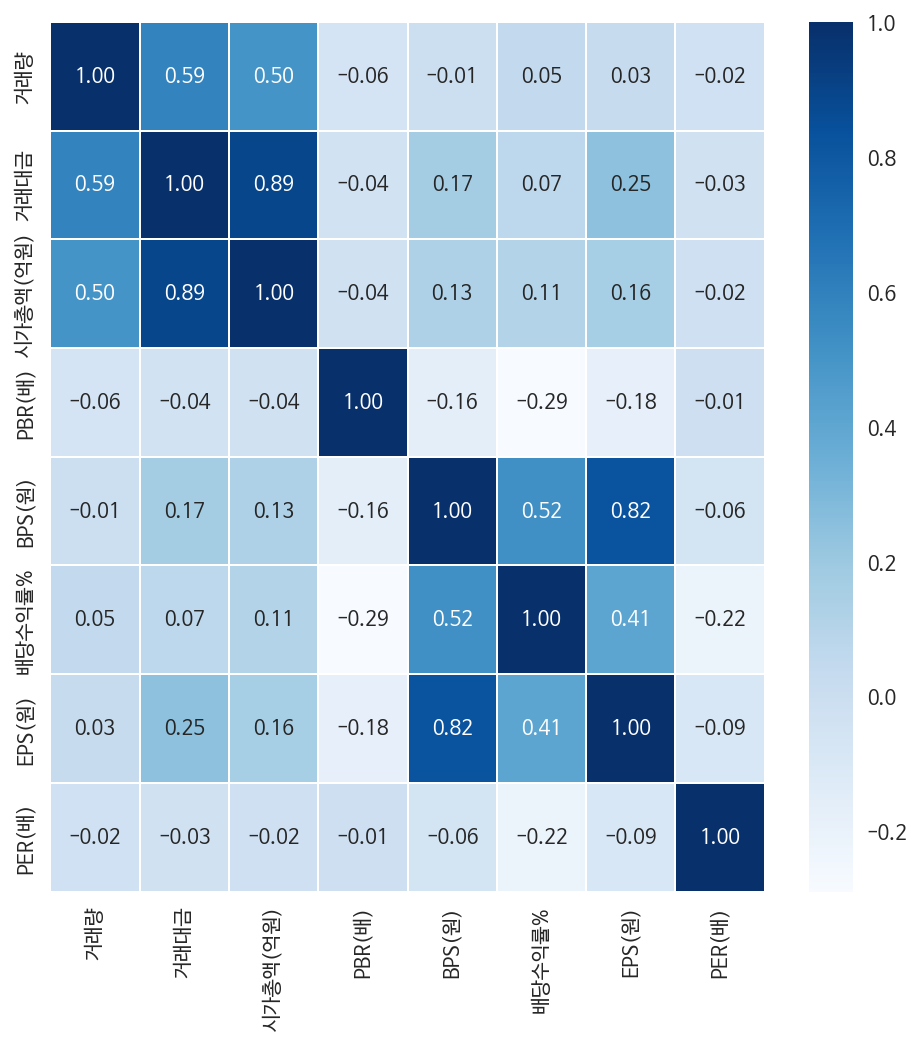

In [119]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df_corr.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')